<a href="https://colab.research.google.com/github/inder-dev-pro/EDA-Mark_Keith/blob/main/Startup_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import kagglehub
import pandas as pd
import plotly.figure_factory as ffdemo
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
!pip install category_encoders
from category_encoders.target_encoder import TargetEncoder
# Download latest version
path = kagglehub.dataset_download("yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase")

In [47]:
print("Path to dataset files:", path)
df=pd.read_csv(path+ r"/big_startup_secsees_dataset.csv")
df.head(5)
print(df.unique())
print(df['status'].value_counts())
df.dropna(subset='status', inplace=True)

['operating' 'acquired' 'closed' 'ipo']


In [46]:
numerical_cols=df.select_dtypes(include=np.number).columns.to_list()
categorical_cols=df.select_dtypes(include=object).columns.to_list()
numerical_cols
categorical_cols
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')
df['first_funding_at']=pd.to_datetime(df['first_funding_at'], errors='coerce')
df['last_funding_at']=pd.to_datetime(df['last_funding_at'], errors='coerce')
df['founded_at']=pd.to_datetime(df['founded_at'], errors='coerce')

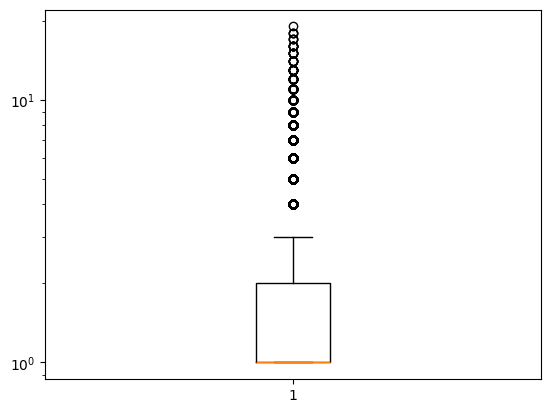

In [4]:
plt.boxplot(x=df['funding_rounds'])
plt.yscale('log')
plt.show()

In [5]:
outlier=[]
def outlier_detection(data):
  threshold=4
  mean=np.mean(data)
  std=np.std(data)

  for i in data:
    if ((i-mean)/std>3):
      outlier.append(i)

  return outlier
out=outlier_detection(df.funding_rounds)

outlier_df_z=pd.DataFrame(out, columns=["Funding_Round_Outlier"])
outlier_df_z

,Funding_Round_Outlier
0,9
1,6
2,9
3,7
4,6
...,...
1725,8
1726,6
1727,8
1728,7


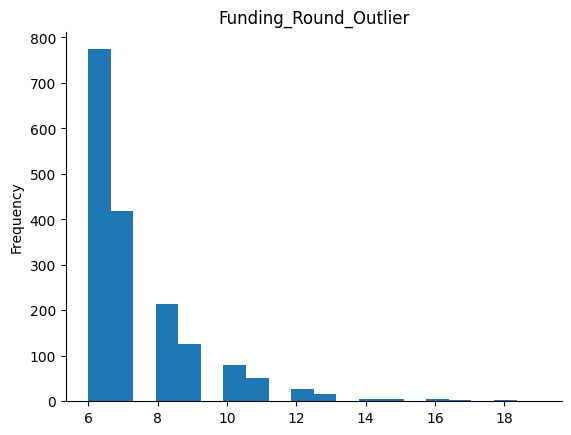

In [8]:
from matplotlib import pyplot as plt
outlier_df_z['Funding_Round_Outlier'].plot(kind='hist', bins=20, title='Funding_Round_Outlier')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
iqr_outlier_list=[]
def IQR(data):
  q1,q3=np.percentile(data,[25,75])
  iqr=q3-q1
  lower_bound=q1-((iqr)*1.5)
  upper_bound=q3+((iqr)*1.5)
  for i in data:
    if (i<lower_bound or i>upper_bound):
      iqr_outlier_list.append(i)
  return iqr_outlier_list
iqr_out=IQR(df.funding_rounds)

outlier_df_iqr=pd.DataFrame(iqr_out,columns=["Outlier_using_IQR"])
outlier_df_iqr

,Outlier_using_IQR
0,4
1,4
2,9
3,5
4,6
...,...
5932,4
5933,4
5934,4
5935,4


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Outlier_using_IQR'].plot(kind='hist', bins=20, title='Outlier_using_IQR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='Outlier_using_IQR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Outlier_using_IQR']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Outlier_using_IQR')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Outlier_using_IQR'].plot(kind='line', figsize=(8, 4), title='Outlier_using_IQR')
plt.gca().spines[['top', 'right']].set_visible(False)

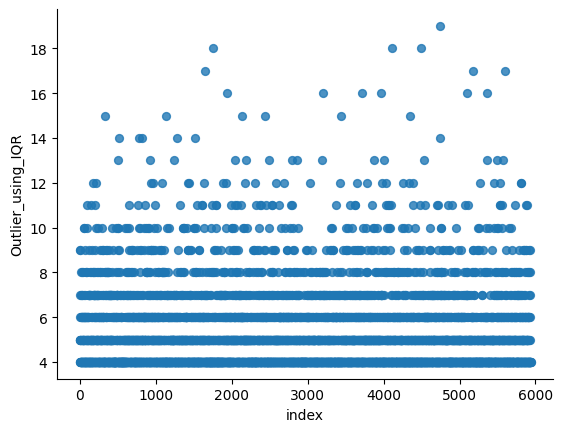

In [11]:
from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='Outlier_using_IQR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [57]:
print(df.first_funding_at)
df.nunique()
df.isnull().sum()
df.isna().sum()

,0
permalink,66368
name,66102
homepage_url,61191
category_list,27296
funding_total_usd,18895
status,4
country_code,137
state_code,311
region,1092
city,5111


In [71]:
!git init
!git remote add origin https://github.com/inder-dev-pro/EDA-Mark_Keith.git
!git branch -m main
!git add .
!git status
!git commit -m "Initial Upload"
!git config --global user.email "inder.31ssb.com"
!git config --global user.name "inder-dev-pro"
!git push origin main

fatal: could not read Username for 'https://github.com': No such device or address
